# Differential expression validation
This notebook performs a differential expression (DE) analysis comparing PAO1 samples vs PA14 samples. We can compare our results with those published in the literature as an additional step to validate that our RNA-seq processing are reasonable.

In [1]:
%load_ext autoreload
%load_ext rpy2.ipython
%autoreload 2

import pandas as pd
import seaborn as sns
import numpy as np
from core_acc_modules import utils, paths
from rpy2.robjects import pandas2ri
pandas2ri.activate()

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
"""# Get raw read counts using PAO1 reference
# Read through all sample subdirectories in quant/
# Within each sample subdirectory, get quant.sf file
data_dir = paths.PAO1_QUANT

expression_data = pd.DataFrame(
    pd.read_csv(file, sep="\t", index_col=0)["NumReads"].
    rename(file.parent.name.split("_")[0]) 
    for file in data_dir.rglob("*/quant.sf"))    

# Map gene ids to gene names
pao1_fasta_file = paths.PAO1_REF

seq_id_to_gene_id_pao1 = utils.dict_gene_num_to_ids(pao1_fasta_file)

expression_data.rename(mapper=seq_id_to_gene_id_pao1, axis="columns", inplace=True)

expression_data.head()"""

'# Get raw read counts using PAO1 reference\n# Read through all sample subdirectories in quant/\n# Within each sample subdirectory, get quant.sf file\ndata_dir = paths.PAO1_QUANT\n\nexpression_data = pd.DataFrame(\n    pd.read_csv(file, sep="\t", index_col=0)["NumReads"].\n    rename(file.parent.name.split("_")[0]) \n    for file in data_dir.rglob("*/quant.sf"))    \n\n# Map gene ids to gene names\npao1_fasta_file = paths.PAO1_REF\n\nseq_id_to_gene_id_pao1 = utils.dict_gene_num_to_ids(pao1_fasta_file)\n\nexpression_data.rename(mapper=seq_id_to_gene_id_pao1, axis="columns", inplace=True)\n\nexpression_data.head()'

In [3]:
# Load gene expression using PAO1 reference
expression_data = pd.read_csv(paths.PAO1_GE, sep='\t', header=0, index_col=0)
print(expression_data.shape)
expression_data.head()

(28, 5685)


,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
SRR7886564,231.716766,190.742049,251.434363,244.575451,232.667420,338.778285,154.619466,135.309196,197.297614,208.656767,...,384.006646,160.423009,217.461069,156.885980,207.875748,401.447266,243.877369,242.992502,246.314856,2505.558825
SRR7886563,221.861101,206.228200,262.510896,236.227489,218.772353,277.169311,172.770017,131.655150,203.906846,195.419829,...,422.431994,186.070549,221.798564,169.894611,206.047320,364.537806,220.715998,222.137392,290.767265,1822.432926
SRR7886556,239.035540,214.717657,274.756361,234.900934,211.425667,331.008247,182.534175,151.789441,177.389040,214.459340,...,313.613041,203.419543,219.460975,122.112693,216.618620,356.472812,204.935818,236.919636,344.232315,840.672326
SRR7886554,207.540231,225.539932,225.249527,219.545459,187.796107,288.503175,170.652752,152.999445,178.938258,189.161895,...,310.622609,162.000331,226.673993,151.294458,188.400366,344.227676,230.639268,215.712007,231.559415,2818.206826
SRR11809604,260.594079,246.812776,266.252334,265.965475,221.272292,326.553412,168.113136,173.746496,222.402769,211.535415,...,407.532934,218.539998,230.043668,167.621171,229.045395,376.025690,245.817934,271.991984,330.510694,3013.898920


### Get core genes

In [4]:
# Get mapping between PAO1 and PA14 genes using PAO1 reference
gene_annot_file = paths.GENE_PAO1_ANNOT
gene_mapping_pao1 = utils.get_pao1_pa14_gene_map(gene_annot_file, 'pao1')
gene_annot_file = paths.GENE_PA14_ANNOT
gene_mapping_pa14 = utils.get_pao1_pa14_gene_map(gene_annot_file, 'pa14')

core_pao1_genes, core_pa14_genes = utils.get_core_genes(gene_mapping_pao1,
                                                        gene_mapping_pa14,
                                                        False)
print(f"Number of PAO1 core genes: {len(core_pao1_genes)}")
print(f"Number of PA14 core genes: {len(core_pa14_genes)}")

core_pao1_genes = set(core_pao1_genes) - set(["PA4215", "PA4214","PA4213"])

expression_data = expression_data.reindex(columns=core_pao1_genes)
print(expression_data.shape)
expression_data.head()

Number of PAO1 core genes: 5366
Number of PA14 core genes: 5363
(28, 5363)


,PA3924,PA5437,PA3314,PA2287,PA4590,PA1358,PA1999,PA1308,PA3726,PA0902,...,PA5543,PA5294,PA3727,PA5504,PA3939,PA0052,PA0326,PA4568,PA2325,PA0115
SRR7886564,201.225395,165.821484,108.757449,129.261293,193.194414,226.216771,151.011108,197.711190,217.327403,109.549144,...,213.471936,154.962333,140.565369,220.980327,0.000000,243.990721,142.914756,459.972222,113.382434,308.898418
SRR7886563,201.796471,186.897736,83.002950,116.179767,205.688706,173.228898,177.366807,185.066717,186.431383,84.516347,...,232.832438,135.180177,138.273625,209.941209,0.000000,204.072687,141.128909,396.268775,121.381609,274.417413
SRR7886556,169.658888,206.470220,112.858680,120.656780,218.670221,191.960835,155.349382,184.785549,189.187145,89.238612,...,203.943701,152.431971,167.296779,251.578478,0.000000,218.299357,156.081171,318.044287,143.806846,313.491681
SRR7886554,189.016406,180.470531,126.252842,147.127973,171.824830,247.199283,129.703172,235.702724,212.267416,101.848199,...,219.985575,146.968990,140.446312,262.965069,0.000000,173.699884,144.808035,255.974719,129.727435,306.820288
SRR11809604,161.961554,204.190959,102.810651,93.401236,236.612969,158.100256,97.576616,180.867453,179.277420,107.095895,...,242.863546,161.200611,147.191150,257.283210,137.951062,284.872508,154.883849,304.887372,93.976078,267.348621


In [5]:
# Convert values to integers for DE analysis
# Not sure why the "Numreads" values are floats
#expression_data = expression_data.astype(int)

In [6]:
# Save file
expression_data.to_csv(paths.PAO1_GE_DE, sep='\t')

### Differential expression analysis

In [7]:
%%R
# Select 59
# Run one time
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
#BiocManager::install("DESeq2")
#BiocManager::install("limma")

In [8]:
%%R
# Load the DESeq2 library
#library("DESeq2")

NULL


In [9]:
# Files to load into DE analysis (R)
metadata_file = str(paths.SAMPLE_ANNOT)
expression_data_file = str(paths.PAO1_GE_DE)
out_file = str(paths.DE_STATS)

In [10]:
# Check ordering of sample ids
utils.check_sample_ordering(expression_data_file, metadata_file)

sample ids don't match, going to re-order gene expression samples


In [11]:
"""%%R -i metadata_file -i expression_data_file -i out_file
expression_data <- t(as.matrix(read.csv(expression_data_file, sep="\t", header=TRUE, row.names=1)))
metadata <- as.matrix(read.csv(metadata_file, sep="\t", header=TRUE, row.names=1))

print("Checking sample ordering...")
print(all.equal(colnames(expression_data), rownames(metadata)))

group <- interaction(metadata[,1])

mm <- model.matrix(~0 + group)

#print(head(expression_data))

ddset <- DESeqDataSetFromMatrix(expression_data, colData=metadata, design = ~genotype)
print(ddset)
print(head( assay(ddset) ))
print(colData(ddset))
deseq_object <- DESeq(ddset)
print(deseq_object)

deseq_results <- results(deseq_object)
deseq_results

deseq_results_df <-  as.data.frame(deseq_results)

write.table(deseq_results_df, file = out_file, row.names = T, sep = "\t", quote = F)

# this is of class DESeqResults -- we want a data.frame
#deseq_df <- deseq_results %>%
  # make into data.frame
#  as.data.frame() %>%
  # the gene names are rownames -- let's make this it's own column for easy 
  # display
#  tibble::rownames_to_column(var = "Gene")

#deseq_df %>%
  # let's sort by statistic -- the highest values should be what is up in the
  # MYCN amplified cell lines
#  dplyr::arrange(dplyr::desc(stat))

#readr::write_tsv(deseq_df, path = deseq_df_file)"""

'%%R -i metadata_file -i expression_data_file -i out_file\nexpression_data <- t(as.matrix(read.csv(expression_data_file, sep="\t", header=TRUE, row.names=1)))\nmetadata <- as.matrix(read.csv(metadata_file, sep="\t", header=TRUE, row.names=1))\n\nprint("Checking sample ordering...")\nprint(all.equal(colnames(expression_data), rownames(metadata)))\n\ngroup <- interaction(metadata[,1])\n\nmm <- model.matrix(~0 + group)\n\n#print(head(expression_data))\n\nddset <- DESeqDataSetFromMatrix(expression_data, colData=metadata, design = ~genotype)\nprint(ddset)\nprint(head( assay(ddset) ))\nprint(colData(ddset))\ndeseq_object <- DESeq(ddset)\nprint(deseq_object)\n\ndeseq_results <- results(deseq_object)\ndeseq_results\n\ndeseq_results_df <-  as.data.frame(deseq_results)\n\nwrite.table(deseq_results_df, file = out_file, row.names = T, sep = "\t", quote = F)\n\n# this is of class DESeqResults -- we want a data.frame\n#deseq_df <- deseq_results %>%\n  # make into data.frame\n#  as.data.frame() %>%\n

In [13]:
%%R
library("limma")

In [14]:
%%R -i metadata_file -i expression_data_file -i out_file
source('../core_acc_modules/DE_analysis.R')

get_DE_stats(metadata_file,
             expression_data_file,
             out_file)

[1] 164


In [15]:
# Read in DE stats file
DE_stats = pd.read_csv(paths.DE_STATS, sep='\t', header=0, index_col=0)
print(DE_stats.shape)
DE_stats.head()

(5363, 6)


,logFC,AveExpr,t,P.Value,adj.P.Val,B
PA4554,-160.955149,74.823019,-55.380599,2.584897e-30,9.041440e-27,0.263434
PA0690,-124.335008,65.198640,-54.856328,3.371784e-30,9.041440e-27,0.262383
PA4553,-227.857396,105.790934,-43.819972,1.765574e-27,3.043870e-24,0.230958
PA3148,-280.568869,130.520299,-43.425342,2.270274e-27,3.043870e-24,0.229383
PA0688,-151.029617,70.161667,-39.776955,2.592738e-26,2.780971e-23,0.212594


### Add gene names for ease of interpretation

In [16]:
# Read gene number to name mapping
gene_name_mapping = pd.read_table(
    paths.GENE_ID2NAME,
    header=0,
    sep=',',
    index_col=0)

gene_name_mapping = gene_name_mapping[["Locus Tag", "Name"]]

gene_name_mapping.set_index("Locus Tag", inplace=True)
print(gene_name_mapping.shape)
gene_name_mapping.head()

(5704, 1)


/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead.
  


,Name
Locus Tag,
"PA0001""",dnaA
"PA0002""",dnaN
"PA0003""",recF
"PA0004""",gyrB
"PA0005""",lptA


In [17]:
# Format gene numbers to remove extraneous quotes
gene_number = gene_name_mapping.index
gene_name_mapping.index = gene_number.str.strip("\"")

gene_name_mapping.dropna(inplace=True)
print(gene_name_mapping.shape)
gene_name_mapping.head(10)

(2215, 1)


,Name
Locus Tag,
PA0001,dnaA
PA0002,dnaN
PA0003,recF
PA0004,gyrB
PA0005,lptA
PA0008,glyS
PA0009,glyQ
PA0010,tag
PA0011,htrB1


In [18]:
# Remove duplicate mapping
# Not sure which mapping is correct in this case
# PA4527 maps to pilC and still frameshift type 4 fimbrial biogenesis protein PilC (putative pseudogene)
gene_name_mapping = gene_name_mapping[~gene_name_mapping.index.duplicated(keep=False)]

In [19]:
# Add gene names
#gene_name_mapping_dict = gene_name_mapping.to_dict()
DE_stats['Gene Name'] = DE_stats.index.map(gene_name_mapping["Name"])
DE_stats.head()

,logFC,AveExpr,t,P.Value,adj.P.Val,B,Gene Name
PA4554,-160.955149,74.823019,-55.380599,2.584897e-30,9.041440e-27,0.263434,pilY1
PA0690,-124.335008,65.198640,-54.856328,3.371784e-30,9.041440e-27,0.262383,pdtA
PA4553,-227.857396,105.790934,-43.819972,1.765574e-27,3.043870e-24,0.230958,pilX
PA3148,-280.568869,130.520299,-43.425342,2.270274e-27,3.043870e-24,0.229383,wbpI
PA0688,-151.029617,70.161667,-39.776955,2.592738e-26,2.780971e-23,0.212594,lapA


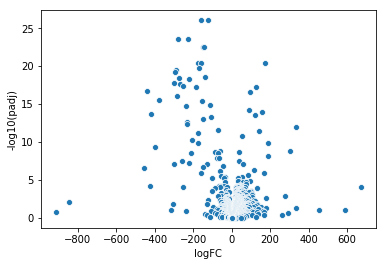

In [20]:
# Plot
#DE_stats["-log10(padj)"] = -np.log10(DE_stats["padj"])
#sns.scatterplot(data=DE_stats, x="log2FoldChange", y="-log10(padj)")

DE_stats["-log10(padj)"] = -np.log10(DE_stats["adj.P.Val"])
sns.scatterplot(data=DE_stats, x="logFC", y="-log10(padj)")

### Compare out results with publication

In [22]:
# Get number of DEGs
#selected_DE_stats = DE_stats[(DE_stats['padj']<0.05) & (abs(DE_stats['log2FoldChange'])>1)]
selected_DE_stats = DE_stats[(DE_stats['adj.P.Val']<0.05) & (abs(DE_stats['logFC'])>1)]

print(selected_DE_stats.shape)
selected_DE_stats.head()

(975, 8)


,logFC,AveExpr,t,P.Value,adj.P.Val,B,Gene Name,-log10(padj)
PA4554,-160.955149,74.823019,-55.380599,2.584897e-30,9.041440e-27,0.263434,pilY1,26.043762
PA0690,-124.335008,65.198640,-54.856328,3.371784e-30,9.041440e-27,0.262383,pdtA,26.043762
PA4553,-227.857396,105.790934,-43.819972,1.765574e-27,3.043870e-24,0.230958,pilX,23.516574
PA3148,-280.568869,130.520299,-43.425342,2.270274e-27,3.043870e-24,0.229383,wbpI,23.516574
PA0688,-151.029617,70.161667,-39.776955,2.592738e-26,2.780971e-23,0.212594,lapA,22.555804


In [23]:
# Compare our findings against Sana et. al.
degs_sana = ["PA3431", "PA3432", "PA1244", "PA4685"]
for gene in degs_sana:
    if gene in list(selected_DE_stats.index):
        print(gene)

PA3432
PA4685


In [24]:
# Compare our findings against Kim et. al.
'PA4236' in list(selected_DE_stats.index)

False

**Conclusions:**
* Our DE analysis found ~1K significantly differentially expressed genes
* [Sana et. al](https://jb.asm.org/content/201/21/e00362-19) found ~ 2K DEGs between 2 strains where QS genes were DEGs. 
* We found 2/4 genes highlighted in the Sana et. al. publication. But we're missing the main qsIA gene (PA1244) that the paper found to be more highly expressed in PAO1 vs PA14. One caveat to this publication is that its only looking at 2 strains so perhaps this explains the difference.
* [Kim et. al.](https://link.springer.com/content/pdf/10.1007/s12275-019-9225-1.pdf) found katA (PA4236) is highly expressed in PAO1 but not PA14 strain. 
* We did not find the katA gene in our analysis. One caveat to this publication is that its only looking at 2 strains so perhaps this explains the difference.